In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from utils import *
import os
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve

In [2]:
datafolder = os.getcwd()+'/datasets/PTB-XL/'
task = "rhythm"
test_fold=10
data, raw_labels = load_dataset(datafolder , 100)
labels = compute_label_aggregations(raw_labels, datafolder, task)
data, labels, Y, _ = select_data(data, labels, task, 0, r"C:\Mohit\Imperial\fyp-hearts\output\exp3\data/")
mlb = np.load(r"C:\Mohit\Imperial\fyp-hearts\output\exp3\data\mlb.pkl", allow_pickle=True)
y_test = Y[labels.strat_fold == test_fold]

In [3]:
path = r"C:\Mohit\Imperial\fyp-hearts\output\exp3\models\Wavelet+RF+lead1"

y_test_pred = np.load(path+r"\y_test_pred.npy", allow_pickle=True)

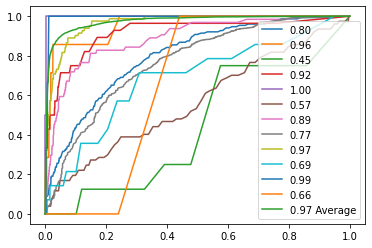

In [4]:
roc_auc_score(y_test, y_test_pred)

fig, ax = plt.subplots()

for i in range(y_test.shape[1]):
    # print(roc_auc_score(y_test[:,i], y_test_pred[:,i]))
    fpr, tpr, _ = roc_curve(y_test[:,i], y_test_pred[:,i])
    auc = roc_auc_score(y_test[:,i], y_test_pred[:,i])
    # RocCurveDisplay.from_predictions(y_test[:,i], y_test_pred[:,i])
    ax.plot(fpr, tpr, label=f"{auc:.2f}")

auc = roc_auc_score(y_test.flatten(), y_test_pred.flatten())
fpr, tpr, _ = roc_curve(y_test.flatten(), y_test_pred.flatten())
ax.plot(fpr, tpr, label=f"{auc:.2f} Average")

plt.legend()
plt.show()    

In [5]:
data, raw_labels = load_dataset(datafolder , 100)
labels = compute_label_aggregations(raw_labels, datafolder, task)
labels

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,scp_codes_len,rhythm,rhythm_len
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,3,[SR],1
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,2,[SBRAD],1
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,2,[SR],1
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,2,[SR],1
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,2,[SR],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,4,[STACH],1
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,3,[SR],1
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,2,[SR],1


In [6]:
classes = mlb.classes_

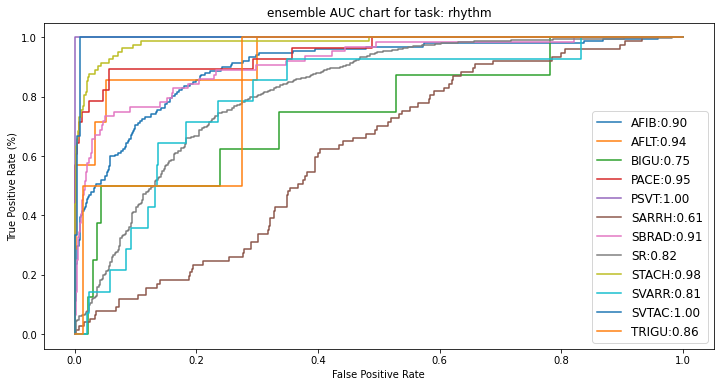

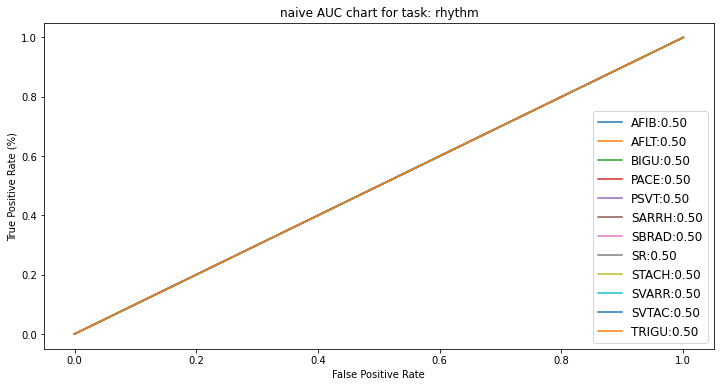

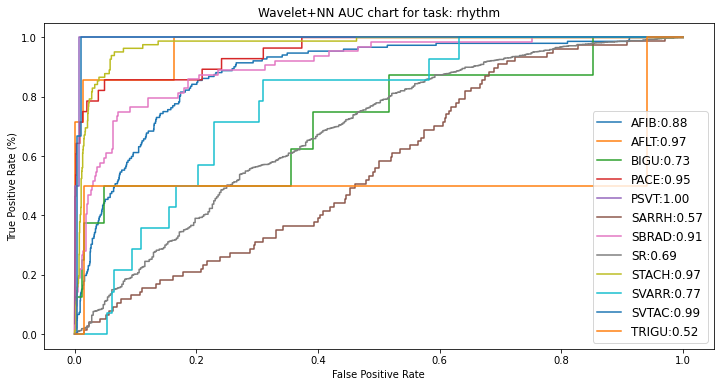

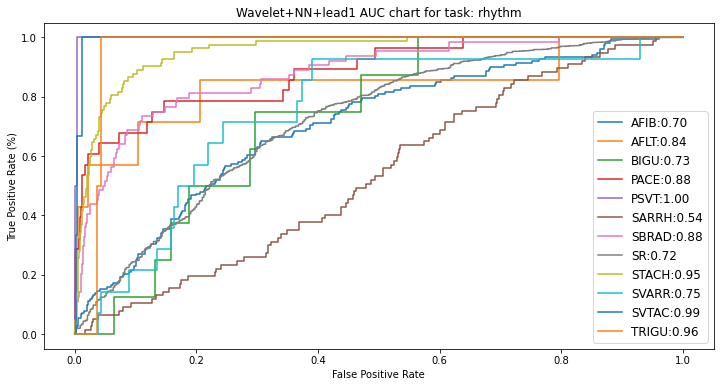

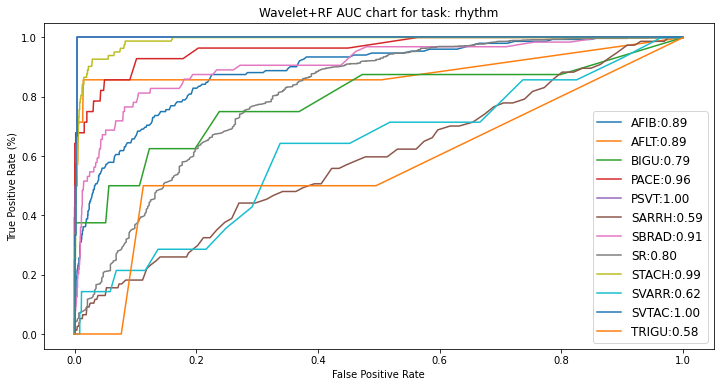

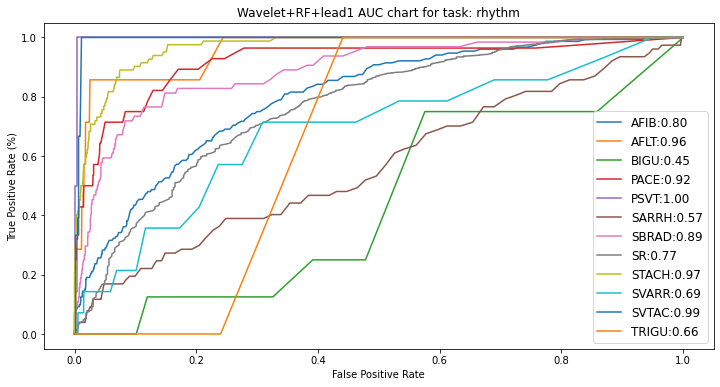

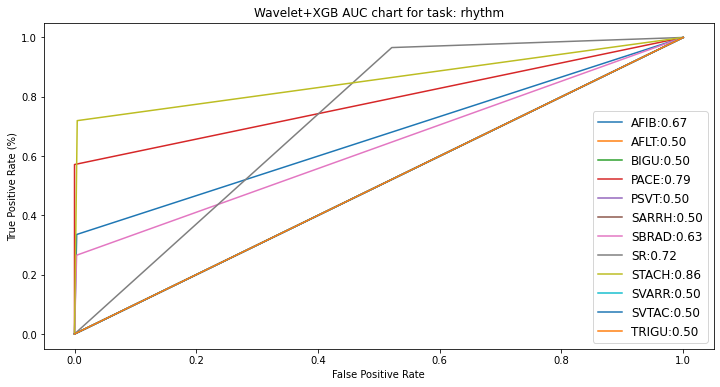

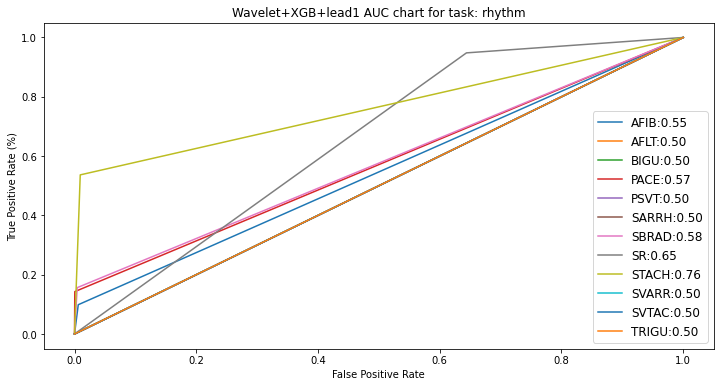

In [9]:
datafolder = os.getcwd()+'/datasets/PTB-XL/'

# tasks = {'all': "exp0", 'rhythm': "exp3", 'diagnostic':"exp1", 'subdiagnostic':"exp1.1", 'superdiagnostic': "exp1.1.1", 'form':"exp2"}
tasks = {"rhythm": "exp3"}
task_list = list(tasks.keys())


for task in task_list:
    test_fold=10
    data, raw_labels = load_dataset(datafolder , 100)
    labels = compute_label_aggregations(raw_labels, datafolder, task)
    exp =  tasks[task]
    exp_folder = os.getcwd()+r"\output"+"\\" + exp + "\\"
    data, labels, Y, _ = select_data(data, labels, task, 0, exp_folder+"data"+"\\")
    mlb = np.load(exp_folder+"data/mlb.pkl", allow_pickle=True)
    models = os.listdir(exp_folder+'/models/')
    mlb_classes = mlb.classes_
    y_test = Y[labels.strat_fold == test_fold]
    
    for model in models:
        fig, ax = plt.subplots(figsize=(12, 6))
        path = exp_folder + f"models\{model}"

        y_test_pred = np.load(path+r"\y_test_pred.npy", allow_pickle=True)
        for i in range(y_test.shape[1]):
            fpr, tpr, _ = roc_curve(y_test[:,i], y_test_pred[:,i])
            auc = roc_auc_score(y_test[:,i], y_test_pred[:,i])
            ax.plot(fpr, tpr, label=f"{mlb_classes[i]}:{auc:.2f}")
        
        plt.title(f"{model} AUC chart for task: {task}")
        plt.legend(loc="lower right", fontsize="large")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate (%)")
        plt.savefig(os.getcwd()+"\\"+"img\\"+f"AUC_{exp}_{model}.png")
        plt.show()
               

    